In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
import mltools.linear
import mltools.transforms as xform

np.random.seed(0)
%matplotlib inline

In [2]:
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X,Y)

In [3]:
Xtr, Xva, Ytr, Yva = ml.splitData(X,Y, .75)

In [1]:
degree = [2,3,4,5,6]

train_error = np.zeros((len(degree)))
test_error = np.zeros((len(degree)))

for i,d in enumerate(degree):
    print(d)
    XtrP = np.hstack([ml.transforms.fpoly(Xtr[:,i].reshape((Xtr.shape[0],1)), d, bias=False) for i in range(Xtr.shape[1])])
    XtrP,params = ml.transforms.rescale(XtrP)
    
    lr = ml.linearC.linearClassify(XtrP, Ytr)
    
    XvaP = np.hstack([ml.transforms.fpoly(Xva[:,i].reshape((Xva.shape[0],1)), d, bias=False) for i in range(Xva.shape[1])])
    XvaP,_ = ml.transforms.rescale(XvaP,params)
    
    train_error[i] = lr.auc(XtrP, Ytr)
    test_error[i] = lr.auc(XvaP, Yva)

In [32]:
test_error.shape

(5,)

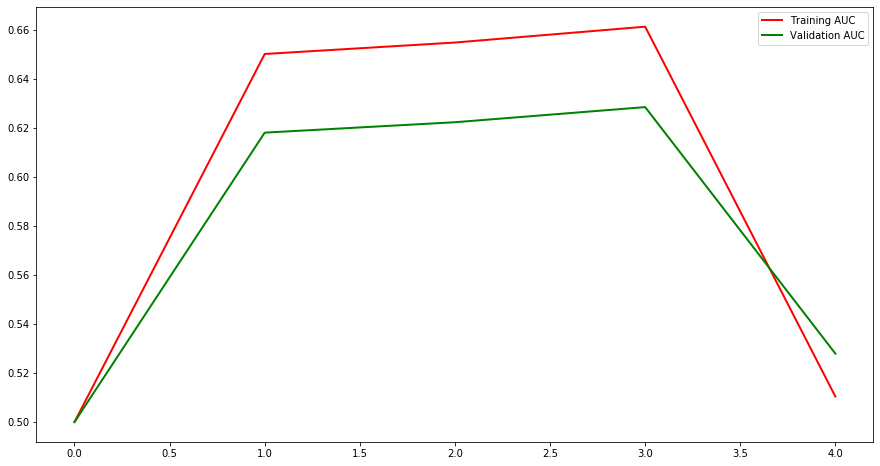

In [33]:
plt.rcParams['figure.figsize'] = (15.0, 8.0)

plt.plot(degree,train_error,'r-',degree,test_error,'g-',linewidth=2);
plt.legend(['Training AUC','Validation AUC'],loc='upper right');

In [ ]:
# Training the model
learner = ml.linearC.linearClassify()
learner.train(XtrP, Yt, initStep=0.5, stopTol=1e-6, stopIter=100)

probs = learner.predictSoft(XteP)
print(probs[:5])

plt.rcParams['figure.figsize'] = (15.0, 8.0)

plt.plot(degrees,train_error,'r-',degrees,test_error,'g-',linewidth=2);
plt.legend(['Training AUC','Validation AUC'],loc='upper right');

In [24]:
degree = range(3)

train_error = np.zeros((len(degree)))
test_error = np.zeros((len(degree)))

for i,d in enumerate(degree):
#     XtrP = ml.transforms.fpoly(Xtr, d, bias=False)
    XtrP = ml.transforms.fpoly(Xtr, d, bias=False)
#     XtrP = np.array([ml.transforms.fpoly(Xtr[:,i], d, bias=False) for i in range(Xtr.shape[1])])
    XtrP,params = ml.transforms.rescale(XtrP)
    
    lr = ml.linearC.linearClassify(XtrP, Ytr)
    
    XvaP = ml.transforms.fpoly(Xva, d, bias=False)
#     XteP = np.array([(ml.transforms.fpoly(Xte[:,i], d, bias=False)).atleast2d() for i in range(Xte.shape[1])])
    XvaP,_ = ml.transforms.rescale(XvaP,params)
    
    train_error[i] = lr.auc(XtrP, Ytr)
    test_error[i] = lr.auc(XvaP, Yva)